[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mosleh-exeter/BEM1025/blob/main/ExamPrep/Exam2/Exam2_Prep1-solutions.ipynb)

In [20]:
# we import the library pandas and give it the "pd" kickname
import pandas as pd
import numpy as np
import seaborn as sns

# **For all questions YOU HAVE TO WRITE SOME CORRECT  PYTHON CODE! simply giving the final answer is not enough!** 

### You need to download this file as ipynb, zip (compress it) it, and upload as a zip file to BART.
<img width="800" height="400" src="https://github.com/mosleh-exeter/BEM1025/raw/main/images/UploadBart.png">

### For all questions YOU HAVE TO WRITE SOME CORRECT PYTHON CODE! simply giving the final answer is not enough! 
### You can provide brief description if you think that helps understanding of your code.
### You need to make your code adaptable and scalable; and avoid manual entry of data as much as it is possible.

### You will work on the following dataframes for this assignment
#### We use sample stock trading data from Amazon (“AMZN”), Apple (“AAPL”), Google (“GOOG”), Facebook ("FB"), and Tesla ("TSLA")
#### The data show the high ("high") and low ("low") prices a stock attained for a particular period of time as well as the opening ("open") and closing ("close") prices and volume ("volume") of trades of the stock for  each period ("date") and for each company ("sybmol").

#### We have collected data in different files, stocks1, stocks2, stocks3.
#### The data files contain similar information but for different companies.

In [21]:
# Here we read three data files with similar structure but containing different information
df_stocks1 = pd.read_csv('https://www.dropbox.com/s/8q3kccblwz803hb/stocks1.csv?dl=1')

In [22]:
df_stocks2 = pd.read_csv('https://www.dropbox.com/s/btxchlcezulmnx9/stocks2.csv?dl=1')

In [23]:
df_stocks3 = pd.read_csv('https://www.dropbox.com/s/eaybbgkx5x5lf3t/stocks3.csv?dl=1')

#### The following dataframe includes additional information such as full name ("name"), number of employees ("employees"), headquarters city and state ("headquarters_city", "headquarters_state" ) for each company

In [24]:
df_companies =pd.DataFrame({
    'symbol':['AMZN','GOOG','AAPL','FB','TSLA'],
    'name':['Amazon','Google','Apple','Facebook','Tesla'],
    'employees':[613300,98771,132000,71970,99000],
    'headquarters_city':['Seattle','Mountain View','Cupertino','Menlo Park','Austin'],
    'headquarters_state':['WA','CA','CA','CA','TX']})

## Task 1 
### Create a new dataframe that includes stock information from **all three stock dataframes** and for each company also **includes information about** "name", "employees", "headquarters_city", and "headquarters_state". The outcome dataframe should have an **index starting from zero** and ending with number of rows minud one.
### **OUTCOME:** The code should display the **last 4 rows** and **shape** of the outcome dataframe.


In [25]:
df_stocks=pd.concat([df_stocks1,df_stocks2,df_stocks3],ignore_index=True)
df_stocks_company_info=pd.merge(df_stocks,df_companies,on='symbol',how='left')
print(df_stocks_company_info.shape)
df_stocks_company_info.tail(4)

(25, 11)


,date,symbol,open,high,low,close,volume,name,employees,headquarters_city,headquarters_state
21,04/03/2019,TSLA,298.12,299.0000,282.78,285.36,17096818,Tesla,99000,Austin,TX
22,05/04/2020,TSLA,282.00,284.0000,270.10,276.54,18764740,Tesla,99000,Austin,TX
23,06/04/2021,TSLA,276.48,281.5058,274.39,276.24,10335485,Tesla,99000,Austin,TX
24,07/04/2021,TSLA,278.84,284.7000,274.25,276.59,9442483,Tesla,99000,Austin,TX


### ** Use the following dataframe to answer the rest of questions; this is similar to the outcome from Task 1 **

In [26]:
df_stocks_company_info=pd.read_csv("https://www.dropbox.com/s/a673miodv8mehjb/df_stock_info.csv?dl=1")

## Task 2
### Using the dataframe you created in Task 1 ("df_stocks_company_info"), find the date and the company for which maximum opening price happened among companies in California ("CA") that have more than 100,000 employees.
### **OUTCOME:** The code should display the name of the company, the date, and the price.

In [11]:
max_open_price=df_stocks_company_info[(df_stocks_company_info['headquarters_state']=='CA') & 
                                      (df_stocks_company_info['employees']>100000)]['open'].max()
print('max price',max_open_price)
df_stocks_company_info[df_stocks_company_info['open']==max_open_price][['date','name','open']]

max price 175.94


,date,name,open
7,05/04/2020,Apple,175.94


## Task 3
### a) Transform the dataframe you created in Task 1 ("df_stocks_company_info") to a long dataframe where the variables "open", "high", "low", "close", "volume" are represented in two columns: one column for the variable type and the other one for its value. Keep the rest of columns similar to "df_stocks_company_info".
### b) Find min, max, and mean of "open", "high", "low", "close", "volume" using the dataframe you created in part (a) for each "headquarters_state"


### **OUTCOME (a):** The code should display the head of the outcome dataframe

In [12]:
df_stocks_company_info_melted=df_stocks_company_info.melt(
                            id_vars=['date','symbol','name','employees','headquarters_city','headquarters_state'],
                            value_vars=['open','high','low','close','volume'])

print(df_stocks_company_info_melted.shape)
df_stocks_company_info_melted.head()

(125, 8)


,date,symbol,name,employees,headquarters_city,headquarters_state,variable,value
0,01/03/2019,AMZN,Amazon,613300,Seattle,WA,open,1655.13
1,04/03/2019,AMZN,Amazon,613300,Seattle,WA,open,1685.00
2,05/04/2020,AMZN,Amazon,613300,Seattle,WA,open,1702.95
3,06/04/2021,AMZN,Amazon,613300,Seattle,WA,open,1695.97
4,07/05/2021,AMZN,Amazon,613300,Seattle,WA,open,1667.37


### **OUTCOME (b):** The code should display the head of outcome dataframe

In [13]:
df_stocks_company_info_melted.groupby(
                        ['headquarters_state','variable'])[['value']] \
                        .agg(['min','max','mean']).head()

value                           
                                     min          max          mean
headquarters_state variable                                        
CA                 close         162.280      1300.00  4.931147e+02
                   high          163.132      1169.61  5.014561e+02
                   low           161.690      1155.49  4.926893e+02
                   open          162.600      1162.49  4.968587e+02
                   volume    1099289.000  28187890.00  1.488603e+07

## Task 4
### (a) For the dataframe you created in Task 1 ("df_stocks_company_info"), create a new column "total_trades_value" using a lambda function by finding average total trades value as follows: (low price "low"+ high price "high")/2 * volume of trades "volume" (sum of "high" and "low" divided by 2 then multiply by "volume") and apply that function to the rows.

### (b) Using the new column you created in part (a), find the top 3 companies with highest average volume of trades (from highest to the lowest)


### **OUTCOME (a):** The code should display the new column "total_trades_value"

In [14]:
df_stocks_company_info['total_trades_value']=df_stocks_company_info.apply(lambda row:(row['high']+row['low'])/2*row['volume'],axis=1)

### **OUTCOME (b):** Display the three companies and their "total_trades_value" in descending order

In [15]:
df_avg_total_trades=df_stocks_company_info.groupby('name').mean()
df_avg_total_trades.sort_values(by='total_trades_value',ascending=False).head(3)

,open,high,low,close,volume,employees,total_trades_value
name,,,,,,,
Amazon,1681.284,1691.79800,1660.632,1611.812,4755355.0,613300.0,7.967777e+09
Tesla,288.476,291.26716,278.684,281.904,15710180.2,99000.0,4.509206e+09
Apple,174.890,175.76600,173.472,181.504,23733309.4,132000.0,4.144076e+09


## Task 5 
### Create a plot to show the changes of average value of closing price ("close") for each year and different companies using the dataset you created in Task 1 ("df_stocks_company_info")

### Tip: You need to use groupby and pd.Grouper to find average value per year
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
### **OUTCOME:** Create a plot where x represents month, y respresents average value of closing price per each year, and lines with different colors represent different companies.



In [16]:
df_stocks_company_info['date_formatted']=pd.to_datetime(
                                        df_stocks_company_info['date'])

moth_avg=df_stocks_company_info.groupby(
                            ['name',pd.Grouper(key='date_formatted',freq='1y')]) \
                            ['close'].mean().reset_index()

<AxesSubplot:xlabel='date_formatted', ylabel='close'>

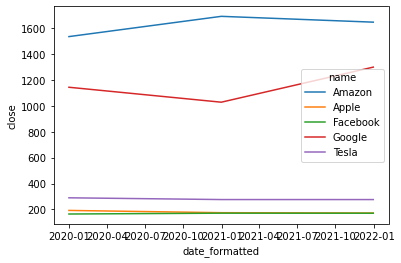

In [17]:
sns.lineplot(data = moth_avg,x="date_formatted", y="close", hue='name')

In [19]:
df_stocks_company_info['date_formatted']=pd.to_datetime(df_stocks_company_info['date']) 
df_avg=df_stocks_company_info.groupby(['name', pd.Grouper(key='date_formatted', freq='y')]).mean() 
df_avg


open       high       low     close      volume  \
name     date_formatted                                                        
Amazon   2019-12-31      1670.065  1691.8450  1662.680  1535.865   5571117.5   
         2020-12-31      1702.950  1707.8000  1689.010  1692.430   3681522.0   
         2021-12-31      1681.670  1683.7500  1644.395  1647.450   4476509.0   
Apple    2019-12-31       174.985   176.4500   173.430   192.485  26661185.0   
         2020-12-31       175.305   175.7450   174.240   175.025  20273901.5   
         2021-12-31       173.870   174.4400   172.020   172.500  24796374.0   
Facebook 2019-12-31       163.250   165.3160   162.760   164.825  14996229.5   
         2020-12-31       167.370   171.8800   166.550   171.260  28187890.0   
         2021-12-31       172.200   172.6550   169.440   170.820  19919113.5   
Google   2019-12-31      1135.945  1150.6250  1127.720  1144.395   1448181.5   
         2020-12-31      1156.275  1168.5900  1150.840  1028.930   1271231.5   
         2021-12-31      1155.720  1156.7600  1134.910  1300.000   1166559.0   
Tesla    2019-12-31       302.530   303.0650   287.340   290.075  20004096.5   
         2020-12-31       282.000   284.0000   270.100   276.540  18764740.0   
         2021-12-31       277.660   283.1029   274.320   276.415   9888984.0   

                         employees  total_trades_value  
name     date_formatted                                 
Amazon   2019-12-31       613300.0        9.352951e+09  
         2020-12-31       613300.0        6.252715e+09  
         2021-12-31       613300.0        7.440134e+09  
Apple    2019-12-31       132000.0        4.664821e+09  
         2020-12-31       132000.0        3.547632e+09  
         2021-12-31       132000.0        4.295476e+09  
Facebook 2019-12-31        71970.0        2.466294e+09  
         2020-12-31        71970.0        4.769814e+09  
         2021-12-31        71970.0        3.409328e+09  
Google   2019-12-31        98771.0        1.649717e+09  
         2020-12-31        98771.0        1.473954e+09  
         2021-12-31        98771.0        1.336684e+09  
Tesla    2019-12-31        99000.0        5.917797e+09  
         2020-12-31        99000.0        5.198771e+09  
         2021-12-31        99000.0        2.755832e+09